In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.classification.deep_learning.inceptiontime import InceptionTimeClassifier
from pathlib import Path
from stroke import Stroke
from constants import *
import os
from services.prepare_data_for_training import prepare_data_for_training
from services.plot_confusion_matrix import plotConfusionMatrix

In [34]:
pathToTestCSV = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV/validation'

In [35]:
strokeList = []

for subfolder in sorted(os.listdir(pathToTestCSV)):
    if subfolder in SELECTED_TRICKS:
        pathToSubFolder = os.path.join(pathToTestCSV, subfolder)
        for file in sorted(os.listdir(pathToSubFolder)):
                strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                stroke = Stroke(data=strokeData, label=subfolder, id=file)

                stroke.normalize()

                strokeList.append(stroke)

In [36]:
modelPath = Path('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/pose_estimation_classification/models/modelsinception_80.zip')
incep = InceptionTimeClassifier.load_from_path(modelPath)

In [40]:
for s in strokeList:
    
    X = np.array(s.data[SELECTED_FEATURES]).reshape(1, s.data[SELECTED_FEATURES].shape[0], s.data[SELECTED_FEATURES].shape[1])
    X = np.nan_to_num(X)

    y = incep.predict(X)
    s.predictedLabel = CLASS_TO_STROKE[y[0]]


1/1 [==============================] - 0s 12ms/step


In [47]:
[s.predictedLabel for s in strokeList]

['Defensive Backhand Backspin',
 'Defensive Backhand Backspin',
 'Defensive Backhand Backspin',
 'Defensive Backhand Backspin',
 'Defensive Backhand Backspin',
 'Defensive Backhand Backspin',
 'Defensive Backhand Block',
 'Defensive Backhand Block',
 'Offensive Forehand Loop',
 'Defensive Backhand Block',
 'Defensive Backhand Block',
 'Defensive Backhand Push',
 'Defensive Backhand Push',
 'Defensive Forehand Backspin',
 'Defensive Forehand Backspin',
 'Defensive Forehand Backspin',
 'Defensive Forehand Backspin',
 'Defensive Forehand Backspin',
 'Defensive Forehand Backspin',
 'Defensive Forehand Block',
 'Defensive Forehand Backspin',
 'Offensive Forehand Loop',
 'Defensive Forehand Backspin',
 'Defensive Forehand Push',
 'Defensive Backhand Block',
 'Defensive Forehand Push',
 'Defensive Forehand Push',
 'Defensive Forehand Block',
 'Defensive Forehand Push',
 'Defensive Forehand Push',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Defensive Forehan

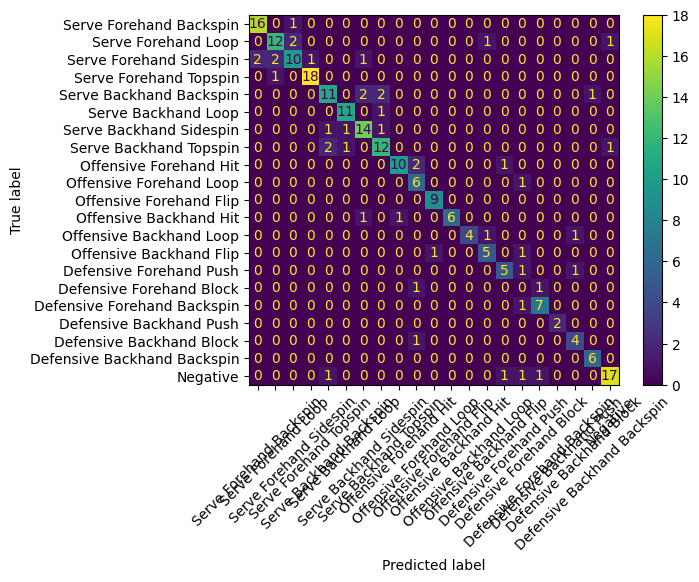

In [48]:
listeClassEncoded = [STROKE_TO_CLASS[s.label] for s in strokeList]
listePred = [STROKE_TO_CLASS[s.predictedLabel] for s in strokeList]
plotConfusionMatrix(listeClassEncoded, listePred, listClasses=STROKE_TO_CLASS)